In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('ObesityDataSet.csv')
df.head()

Gender   Age  Height  ...        CALC                 MTRANS           NObeyesdad
0  Female  21.0    1.62  ...          no  Public_Transportation        Normal_Weight
1  Female  21.0    1.52  ...   Sometimes  Public_Transportation        Normal_Weight
2    Male  23.0    1.80  ...  Frequently  Public_Transportation        Normal_Weight
3    Male  27.0    1.80  ...  Frequently                Walking   Overweight_Level_I
4    Male  22.0    1.78  ...   Sometimes  Public_Transportation  Overweight_Level_II

[5 rows x 17 columns]

In [28]:
df.shape

(2111, 17)

**Some attributes meanings:**

- FAVC Do you eat high caloric food frequently?
- FCVC Do you usually eat vegetables in your meals?
- NCP How many main meals do you have daily?
- CAEC Do you eat any food between meals?
- SMOKE Do you smoke?
- CH2O How much water do you drink daily?
- SCC Do you monitor the calories you eat daily?
- FAF How often do you have physical activity?
- TUE How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- CALC How often do you drink alcohol?
- MTRANS Which transportation do you usually use?
- NObeyesdad Obesity level

In [25]:
# Renaming columns
rename_columns = {
    "FAVC": "frequent_high_calorie_food",
    "FCVC": "vegetables_with_meals",
    "NCP": "daily_main_meals",
    "CAEC": "snacks_between_meals",
    "SMOKE": "smokes",
    "CH2O": "daily_water_intake",
    "SCC": "calorie_intake_monitoring",
    "FAF": "physical_activity_freq",
    "TUE": "daily_tech_device_usage",
    "CALC": "alcohol_consumption_freq",
    "MTRANS": "transportation_mode",
    "NObeyesdad": "obesity_level"
}

df = df.rename(columns=rename_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   frequent_high_calorie_food      2111 non-null   object 
 6   vegetables_with_meals           2111 non-null   float64
 7   daily_main_meals                2111 non-null   float64
 8   snacks_between_meals            2111 non-null   object 
 9   smokes                          2111 non-null   object 
 10  daily_water_intake              2111 non-null   float64
 11  calorie_intake_monitoring       2111 non-null   object 
 12  physical_activity_freq          21

In [26]:
# Converting object variables to category variables
cat_columns = ["Gender", "family_history_with_overweight", "frequent_high_calorie_food", "snacks_between_meals", "smokes", "calorie_intake_monitoring", "alcohol_consumption_freq", "transportation_mode", "obesity_level"]

for col in cat_columns:
    df[col] = df[col].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   frequent_high_calorie_food      2111 non-null   category
 6   vegetables_with_meals           2111 non-null   float64 
 7   daily_main_meals                2111 non-null   float64 
 8   snacks_between_meals            2111 non-null   category
 9   smokes                          2111 non-null   category
 10  daily_water_intake              2111 non-null   float64 
 11  calorie_intake_monitoring       2111 non-null   category
 12  physical_activity_fr

<Figure size 1200x600 with 0 Axes>

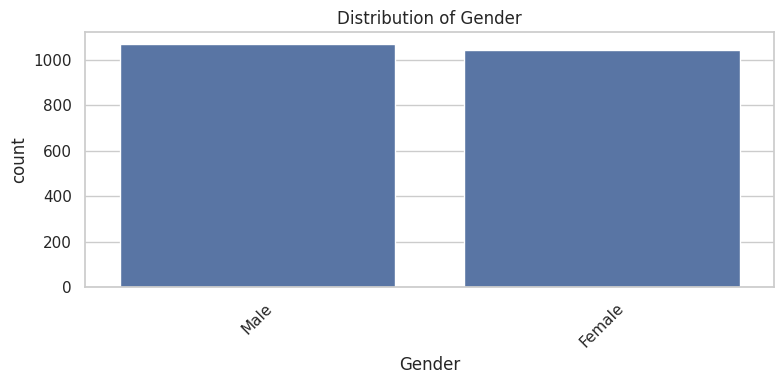

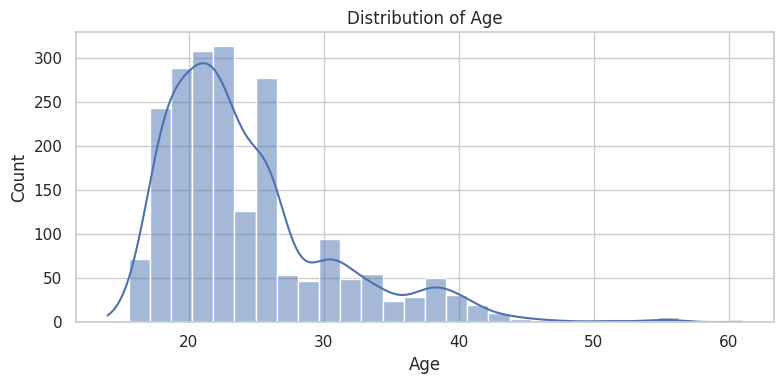

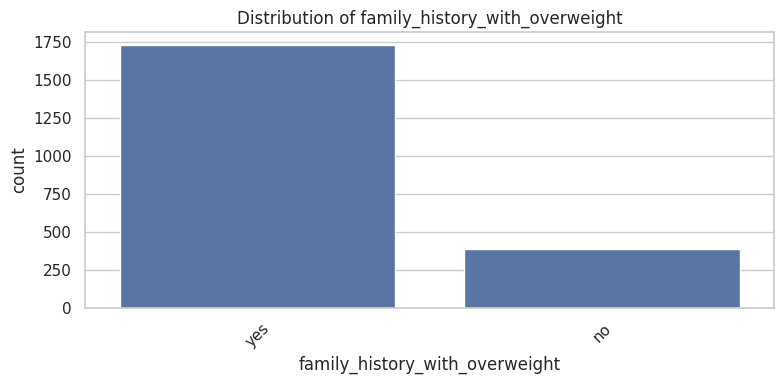

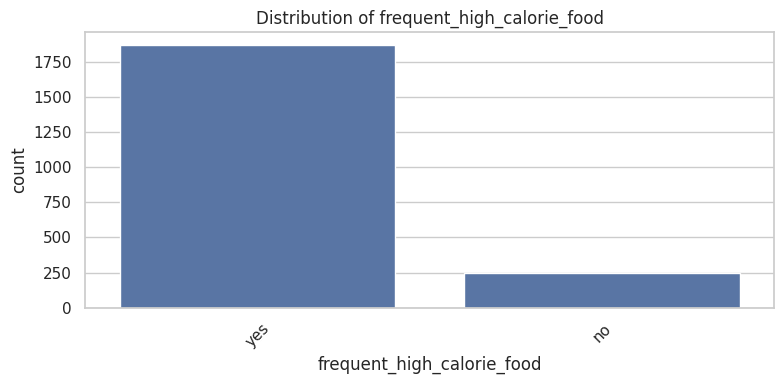

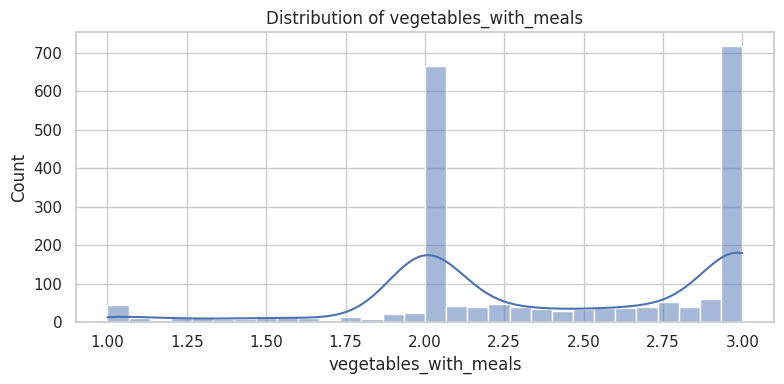

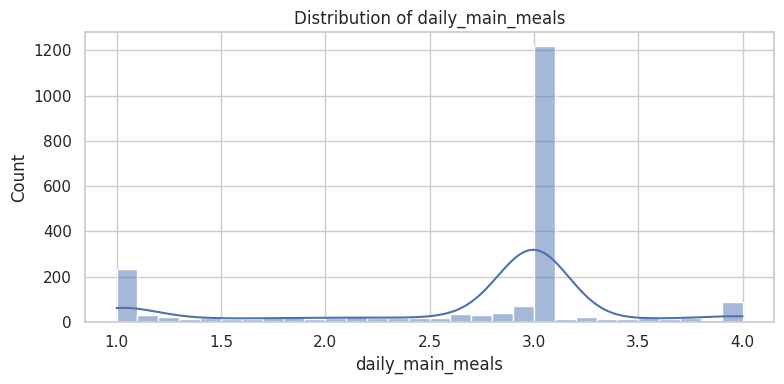

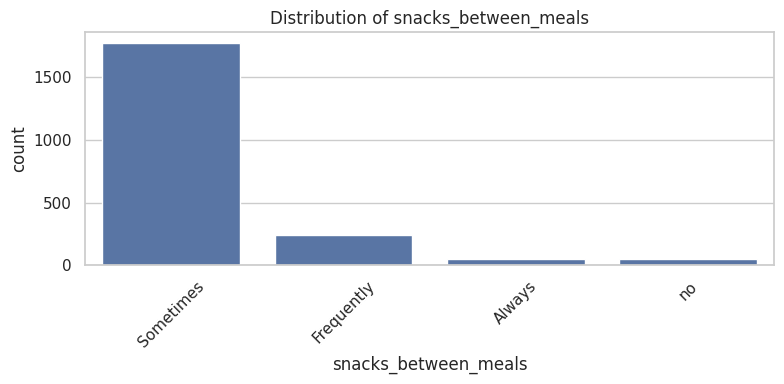

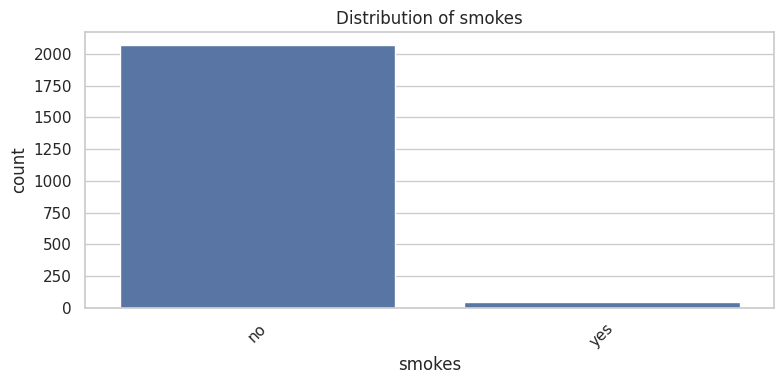

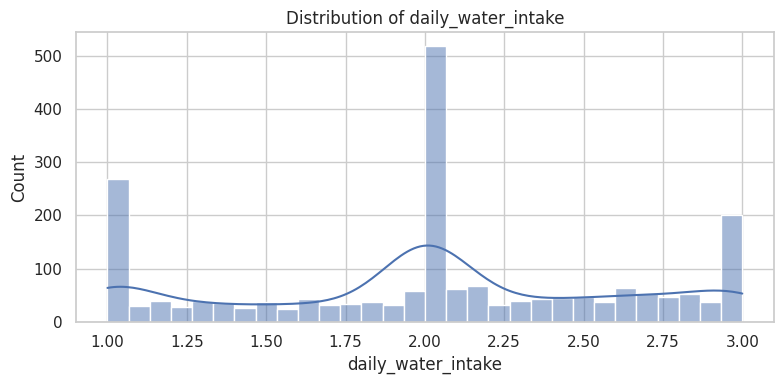

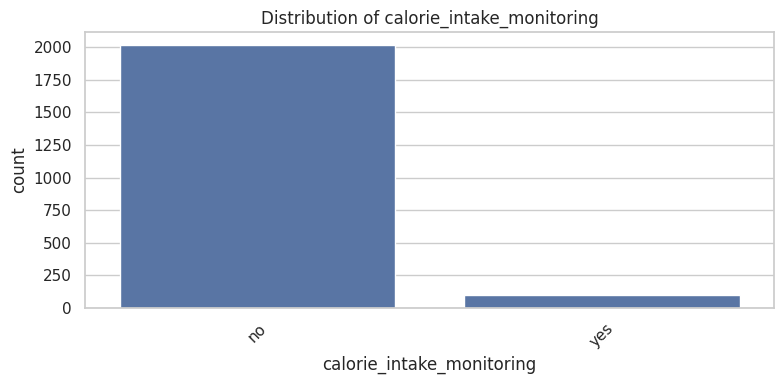

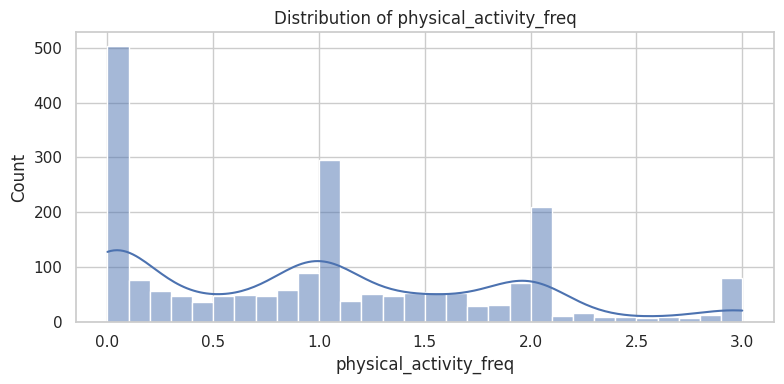

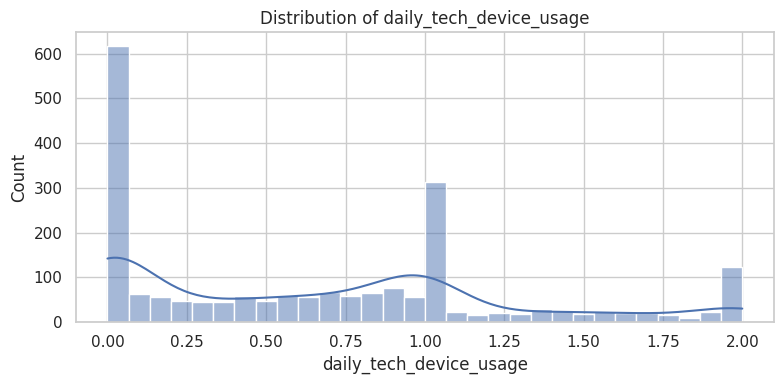

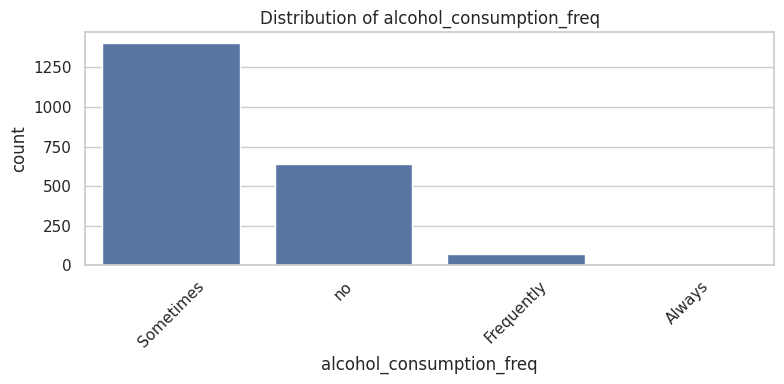

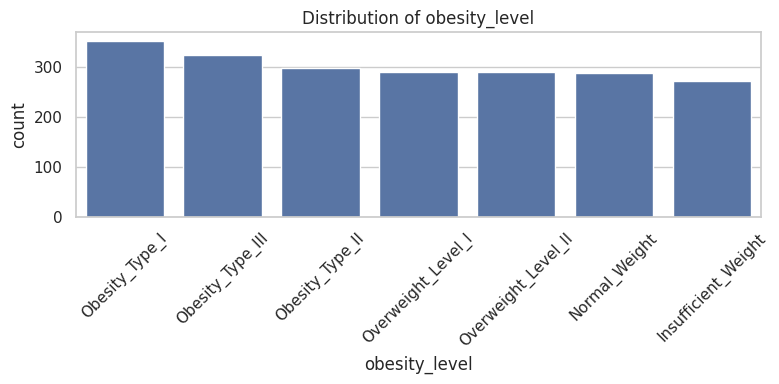

In [27]:
# features and target distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

columns = ['Gender', 'Age', 'family_history_with_overweight', 'frequent_high_calorie_food', 'vegetables_with_meals', 'daily_main_meals',
           'snacks_between_meals', 'smokes', 'daily_water_intake', 'calorie_intake_monitoring', 'physical_activity_freq', 'daily_tech_device_usage',
           'alcohol_consumption_freq', 'obesity_level']

for col in columns:
    plt.figure(figsize=(8, 4))
    
    if df[col].dtype == 'category' or df[col].nunique() < 15:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    else:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()
